In [1]:
import numpy as np,matplotlib.pyplot as plt,scipy as sp

In [2]:
#This cell needs user input
#Set ic_viscosityTest.initialTemperature and lbm.initialTemperature to the same test temeprature, e.g. 0.03333
#Set lbm.nu to the desired viscosity, e.g. 0.0010
#Please refer to the plot at the end of the notebook for a reasoanble range to play with
#Run the marbles code

#Enter the maximum velocity in the domain at each time step in a list called "uxMaxList"

#nu=0.0001
#0.00003333
#uxMaxList=[0.00001000000000006551, 0.00000999511185454698,0.000009990223299412856,0.000009985337138478791,0.000009980453356023808,0.000009975571966461126]

#0.000016665
#uxMaxList=[0.00005270199237228379,0.000052676907342226576,0.00005265180639660203,0.00005262671741089268,0.00005260164038126802,0.00005257657530033559,0.00005255152216327203]

#0.0000083325
#uxMaxList=[0.00003726593618835758,0.0000372498650813973,0.000037233771950543785,0.00003721768577238218,0.00003720160654473058,0.00003718553426339558]

#0.0003333
#uxMaxList=[0.00023569047498783746,0.00023557417377456587,0.0002354579423384744,0.00023534176824824244,0.00023522565148285937,0.00023510959200675718]

#0.003333
#uxMaxList=[0.0007453187237684844,0.0007449503436417107,0.0007445827558146017,0.0007442153493769334,0.0007438481242158305,0.0007434810802453358]

#0.03333
#uxMaxList=[0.0023569047498785975,0.0023557223936788965,0.0023545599964885284,0.002353398172856396,0.0023522369225078403,0.0023510762451703225]

#0.3333
uxMaxList=[0.007453187237685739,0.007448895859827816,0.00744522187857788,0.007441548411450876,0.007437876758520972,0.007434206917180952]

samplingInterval=5000 #The interval between consecutive readings. "max_step" value in the marbles input file

nY=200.0 #wavelength on the sine wave. "ic_viscosityTest.waveLength" in the marbles input file

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
nu recovered is 0.000104556395716762


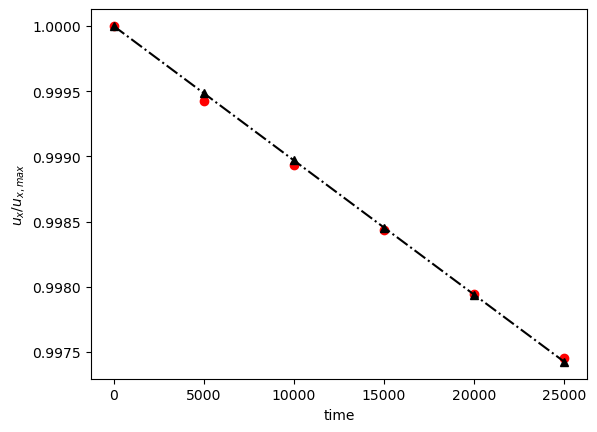

In [3]:
#Execute this cell as is. Prints the recovered kinematic viscosity. Visually check the curve fit 

# viscosity test
from scipy.optimize import curve_fit

uxMaxArray=np.asarray(uxMaxList)[:]/uxMaxList[0]
tArray=np.arange(len(uxMaxList))[:]*samplingInterval

print(type(uxMaxArray),type(tArray))

def fit(t_,a_):
    return np.exp(-a_*t_)

popt,pcov=curve_fit(fit,tArray,uxMaxArray,p0=0.00010)

plt.plot(tArray,uxMaxArray,'ro')
plt.plot(tArray,fit(tArray,popt[0]),'k-.^')
nuRecovered=popt[0]/pow((2.0*np.pi/nY),2)
plt.ylabel(r'$u_x/u_{x,max}$')
plt.xlabel('time')
print('nu recovered is',nuRecovered)

In [4]:
#Some readings taken at various temperatures

PByRhoWithCorrection0p0001=[0.0000083325,0.000016665,0.00003333,0.0003333,0.003333,0.03333,0.3333]
nuRecoveredWithCorrection0p0001=[8.752389508818336e-05,9.655888575570699e-05,9.912005978686417e-05,0.00010001058594407982,0.00010006171279929167,0.00010047037490018057,0.000104556395716762]

PByRhoWithCorrection0p001=[0.3333,0.03333,0.003333,0.0003333,0.00016665,0.000083325]
nuRecoveredWithCorrection0p001=[0.0010247274007715574,0.0010173939291227424,0.0010247274007715574,0.0009908869945360408,0.0009649512404285938,0.0008743684126622247]

PByRhoWithCorrection0p01=[0.3333,0.03333,0.003333,0.0016665,0.00083325]
nuRecoveredWithCorrection0p01 =[0.010014845734417641,0.010001635237936712,0.009909324681269585,0.009650364044259478,0.008744969541304054]

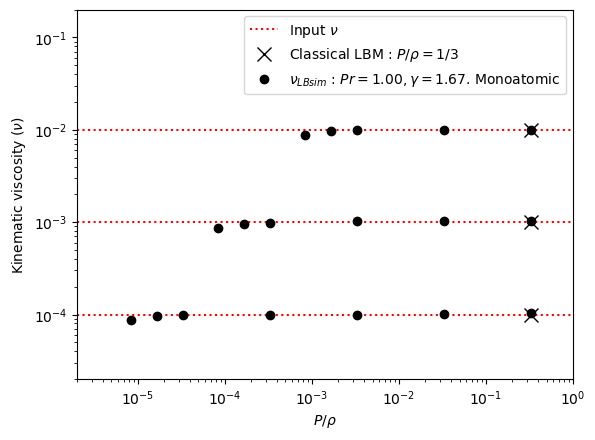

In [36]:
#Plotting
plt.axhline(y=0.0001,linestyle='dotted',color='red')
plt.axhline(y=0.001,linestyle='dotted',color='red')
plt.axhline(y=0.01,linestyle='dotted',color='red',label='Input '+r'$\nu$')

plt.loglog(np.ones(3)/3.0,np.array([0.01,0.001,0.0001]),label='Classical LBM : '+r'${P}/{\rho}=1/3$',marker='x',markersize=10,color='k',linestyle='none')
plt.loglog(PByRhoWithCorrection0p0001,nuRecoveredWithCorrection0p0001,label=r'$\nu_{LB sim}$ : '+r'$Pr=1.00, \gamma=1.67$'+'. Monoatomic',marker='o',color='k',linestyle='none')
plt.loglog(PByRhoWithCorrection0p001,nuRecoveredWithCorrection0p001,marker='o',color='k',linestyle='none')
plt.loglog(PByRhoWithCorrection0p01,nuRecoveredWithCorrection0p01,marker='o',color='k',linestyle='none')

plt.xlabel(r'${P}/{\rho}$')
plt.ylabel('Kinematic viscosity '+r'$(\nu)$')
plt.ylim(2e-5,2e-1)
plt.xlim(2e-6,1.0)
plt.legend(loc='best')